<a href="https://colab.research.google.com/github/FlyPig23/Machine-Learning/blob/main/CSE_5523_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stochastic Gradient Descent
**Authors: Adam Wang, Hangxiao Zhu**

## Generate data

**Data Distribution D:** In practice, the data distribution is usually unknown. However, since you will be asked to generate training and test examples for the sake of running your experiments, we will describe a data distribution from which examples will be generated for each scenario. (Nevertheless, note that the SGD learner should remain oblivious to the distribution). Each example (x, y) is generated as follows:


*   with probability 1/2, set y = −1 and generate a (d−1)-dimensional Gaussian 
vector u ∼ N(μ0, σ2Id−1) where μ0 = (−1/4, −1/4, −1/4, −1/4) and Id−1 is the identity matrix of rank d − 1, that is, u is composed of 4 i.i.d. Gaussian components, each of mean −1/4 and variance σ2 (σ will be specified later).
*   with the remaining probability, set y = 1 and generate u ∼ N (μ1, σ2Id−1) where μ1 = (1/4, 1/4, 1/4, 1/4).

In [ ]:
# Import libraries.
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Fix the size of testing data set as required.
TESTING_SIZE=30

In [ ]:
# This function generates the data using the distribution introduced in the project instruction.
def generate_data(size, sigma):
  data = np.zeros((4, size))
  labels = np.zeros((1, size))
  for x in range(0,size):
    if np.random.rand() > 0.5:
      data.T[x] = euclidean_projection(np.array([np.random.normal(-1/4, sigma), np.random.normal(-1/4, sigma), np.random.normal(-1/4, sigma), np.random.normal(-1/4, sigma)]))
      labels.T[x] = -1
    else:
      data.T[x] = euclidean_projection(np.array([np.random.normal(1/4, sigma), np.random.normal(1/4, sigma), np.random.normal(1/4, sigma), np.random.normal(1/4, sigma)]))
      labels.T[x] = 1
  data = np.vstack((np.ones((1, size)), data))
  return data, labels

Then, set x = ΠX(u) where ΠX is the Euclidean projection on to X,that is,u generated above is projected onto X (in case it lies outside X) and the resulting vector is denoted as x, which represents the feature vector.

In [ ]:
# This function compute the euclidean projection of a point to the parameter set C (which is specified in the project introduction).
def euclidean_projection(u):
  size = u.size
  origin = np.zeros(size)
  distance = np.linalg.norm(u - origin)
  x = u
  if distance > 1:
    x = u / np.linalg.norm(u)
  return x

## SGD Implementation

In [ ]:
# This function outputs the logistic loss given a dataset, the correct label set of that dataset, and a weight vector.
def logistic_loss(w, x, y): 
  return np.log(1 + np.exp(-y * np.dot(w, x)))

In [ ]:
# This function outputs the gradient of logistic loss given a dataset, the correct label set of that dataset, and a weight vector.
def logistic_loss_gradient(w, x, y):
  return (-y * x * np.exp(-y * np.dot(w, x))) / (1 + np.exp(-y * np.dot(w, x)))

logistic_loss is convex and ||x||-Lipschitz

ρ = 5, M = 2

In [ ]:
# This function is the implementation of SGD.
def SGD(data, labels, T, eta):
  w = np.zeros((T, 5)) # Create the array to store weight vertor for all the iterations.
  for t in range(0,T-1):
    i = np.random.randint(data.shape[1]) # Randomly draw a data from the dataset.
    G = logistic_loss_gradient(w[t], data.T[i], labels.T[i]) # Compute the gradient.
    w[t + 1] = euclidean_projection((w[t].reshape(1, 5) - eta*G)) # Update the weight.
  return np.mean(w, axis=0) 

In [ ]:
# This function runs the SGD and computes different metrics.
def run(eta,training_size, sigma, testing_data, testing_labels):
  trials = 30
  T = training_size
  training_data, training_labels = generate_data(training_size, sigma)  
  w = np.zeros((trials, 5))
  mean_loss = np.zeros((trials, 1)) # Array to store the average of logistic loss for each trial.
  std_loss = np.zeros((trials, 1)) # Array to store the standard deviation of logistic loss for each trial.
  min_loss = np.zeros((trials, 1)) # Array to store the minimum value of logistic loss for each trial.
  classification_error = np.zeros((trials, 1)) # Array to store the classification error for each trial.

  for i in range(0,trials):
    w[i] = SGD(training_data, training_labels, T, eta)
    traing_loss = logistic_loss(w[i], training_data, training_labels)
    testing_loss = logistic_loss(w[i], testing_data, testing_labels)
    mean_loss[i] = np.average(testing_loss)
    std_loss[i] = np.std(testing_loss)
    min_loss[i] = np.min(testing_loss)

    # Compute the classification error.
    temp = np.sign(np.dot(w[i], testing_data)) - testing_labels
    errors = np.where(temp == 0, temp, 1) # Set the values that not equals to 0 (2 and -2) to 1.
    classification_error[i] = np.average(errors)

  return np.mean(mean_loss), np.mean(std_loss), np.mean(min_loss), np.mean(mean_loss-min_loss), np.mean(classification_error), np.std(classification_error)

## Experiment

### Create an array to store excess_risks and mean_errors.

In [ ]:
plot_data_1 = np.zeros((4, 2))
yerr_1 = np.zeros((4, 2))

### sigma = 0.1, n = 50

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.1)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=50, sigma=0.1, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_1[0, :] = [excess_risk, mean_error]
yerr_1[0, :] = [std_loss, std_error]

0.5592018440074678 0.06699547140481578 0.4645300528164705 0.09467179119099726 0.07888888888888888 0.14919123530341194


### sigma = 0.1, n = 100

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.1)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=100, sigma=0.1, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_1[1, :] = [excess_risk, mean_error]
yerr_1[1, :] = [std_loss, std_error]

0.5252464672237189 0.04598073431392381 0.45092404374511347 0.07432242347860538 0.0022222222222222222 0.011967032904743343


### sigma = 0.1, n = 500

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.1)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=500, sigma=0.1, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_1[2, :] = [excess_risk, mean_error]
yerr_1[2, :] = [std_loss, std_error]

0.47785024028180967 0.040046384388874215 0.4054391158557647 0.07241112442604487 0.0 0.0


### sigma = 0.1, n = 1000

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.1)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=500, sigma=0.1, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_1[3, :] = [excess_risk, mean_error]
yerr_1[3, :] = [std_loss, std_error]

0.4962656117160877 0.05443547977347853 0.381607147251763 0.11465846446432464 0.0 0.0


### Plot (sigma = 0.1)

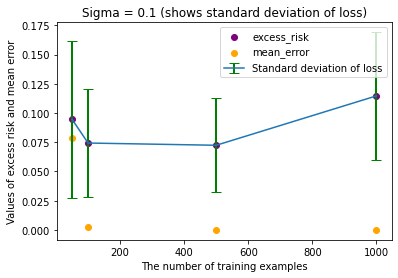

In [ ]:
plot_x = np.array([[50, 50], [100, 100], [500, 500], [1000, 1000]])
plt.title("Sigma = 0.1 (shows standard deviation of loss)")
plt.xlabel("The number of training examples")
plt.ylabel("Values of excess risk and mean error")
plt.scatter(plot_x[:, 0], plot_data_1[:, 0], c = "purple", label = "excess_risk")
plt.scatter(plot_x[:, 1], plot_data_1[:, 1], c = "orange", label = "mean_error")
plt.errorbar(plot_x[:, 0], plot_data_1[:, 0], yerr = yerr_1[:, 0], ecolor = "green", elinewidth = 2, capsize = 5, label = "Standard deviation of loss")
plt.legend(loc="upper right")

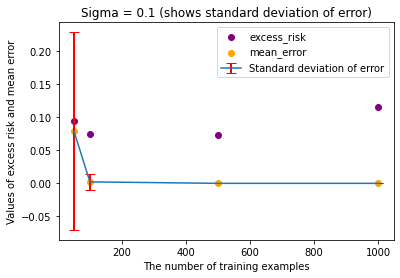

In [ ]:
plot_x = np.array([[50, 50], [100, 100], [500, 500], [1000, 1000]])
plt.title("Sigma = 0.1 (shows standard deviation of error)")
plt.xlabel("The number of training examples")
plt.ylabel("Values of excess risk and mean error")
plt.scatter(plot_x[:, 0], plot_data_1[:, 0], c = "purple", label = "excess_risk")
plt.scatter(plot_x[:, 1], plot_data_1[:, 1], c = "orange", label = "mean_error")
plt.errorbar(plot_x[:, 1], plot_data_1[:, 1], yerr = yerr_1[:, 1], ecolor = "red", elinewidth = 2, capsize = 5, label = "Standard deviation of error")
plt.legend(loc="upper right")

### Create an array to store excess_risks and mean_errors.

In [ ]:
plot_data_2 = np.zeros((4, 2))
yerr_2 = np.zeros((4, 2))

### sigma = 0.35, n = 50

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.35)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=50, sigma=0.35, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_2[0, :] = [excess_risk, mean_error]
yerr_2[0, :] = [std_loss, std_error]

0.5793884740263437 0.10217253297637638 0.43643226756798975 0.1429562064583539 0.15333333333333332 0.06242031957861395


### sigma = 0.35, n = 100

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.35)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=100, sigma=0.35, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_2[1, :] = [excess_risk, mean_error]
yerr_2[1, :] = [std_loss, std_error]

0.571820399181271 0.12332105869294141 0.40388175640593466 0.1679386427753363 0.12666666666666668 0.05192587309132409


### sigma = 0.35, n = 500

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.35)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=500, sigma=0.35, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_2[2, :] = [excess_risk, mean_error]
yerr_2[2, :] = [std_loss, std_error]

0.5215048593257225 0.12415075857713984 0.34256685850172014 0.1789380008240023 0.11333333333333334 0.016329931618554516


### sigma = 0.35, n = 1000

In [ ]:
testing_data, testing_labels = generate_data(TESTING_SIZE, 0.35)

In [ ]:
mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error = run(eta=0.1, training_size=1000, sigma=0.35, testing_data=testing_data, testing_labels=testing_labels)
print(mean_loss, std_loss, min_loss, excess_risk, mean_error, std_error)
plot_data_2[3, :] = [excess_risk, mean_error]
yerr_2[3, :] = [std_loss, std_error]

0.49886402195947904 0.10104263449598976 0.35204529131746476 0.14681873064201423 0.03444444444444445 0.005983516452371672


### Plot (sigma = 0.35)

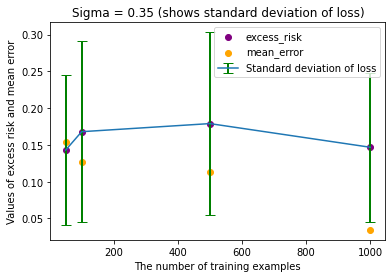

In [ ]:
plot_x = np.array([[50, 50], [100, 100], [500, 500], [1000, 1000]])
plt.title("Sigma = 0.35 (shows standard deviation of loss)")
plt.xlabel("The number of training examples")
plt.ylabel("Values of excess risk and mean error")
plt.scatter(plot_x[:, 0], plot_data_2[:, 0], c = "purple", label = "excess_risk")
plt.scatter(plot_x[:, 1], plot_data_2[:, 1], c = "orange", label = "mean_error")
plt.errorbar(plot_x[:, 0], plot_data_2[:, 0], yerr = yerr_2[:, 0], ecolor = "green", elinewidth = 2, capsize = 5, label = "Standard deviation of loss")
plt.legend(loc="upper right")

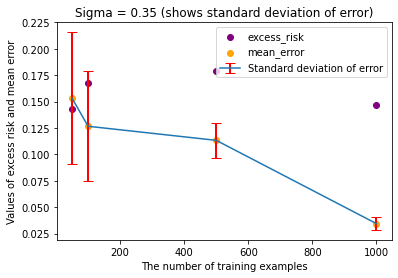

In [ ]:
plot_x = np.array([[50, 50], [100, 100], [500, 500], [1000, 1000]])
plt.title("Sigma = 0.35 (shows standard deviation of error)")
plt.xlabel("The number of training examples")
plt.ylabel("Values of excess risk and mean error")
plt.scatter(plot_x[:, 0], plot_data_2[:, 0], c = "purple", label = "excess_risk")
plt.scatter(plot_x[:, 1], plot_data_2[:, 1], c = "orange", label = "mean_error")
plt.errorbar(plot_x[:, 1], plot_data_2[:, 1], yerr = yerr_2[:, 1], ecolor = "red", elinewidth = 2, capsize = 5, label = "Standard deviation of error")
plt.legend(loc="upper right")